##   R-এ Pandas ব্যবহার

আমাদের R-এ pandas-এর ব্যবহার সমাধান করতে dplyr লাইব্রেরি ব্যবহার করতে হবে। আমরা সাধারণ ডেটা সায়েন্স লাইব্রেরি আমদানি করার মাধ্যমে শুরু করব।


In [28]:
options(warn=-1)
library(dplyr)
library(tidyverse)
library(lubridate)
library(zoo)
library(xts)
library('ggplot2')

সিরিজ হলো একটি তালিকা বা 1D-অ্যারে, তবে এতে ইনডেক্স থাকে। সমস্ত অপারেশন ইনডেক্সের সাথে সামঞ্জস্যপূর্ণ। R-এ কোনো সারির ইনডেক্সিং করতে হলে আমাদের row.names ব্যবহার করতে হবে।


In [29]:
a<- 1:9

In [30]:
b = c("I","like","to","use","Python","and","Pandas","very","much")

In [31]:
a1 = length(a)
b1 = length(b)

In [32]:
a = data.frame(a,row.names = c(1:a1))
print(a)

  a
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9


In [33]:
b = data.frame(b,row.names = c(1:b1))
print(b)

       b
1      I
2   like
3     to
4    use
5 Python
6    and
7 Pandas
8   very
9   much


সিরিজের একটি সাধারণ ব্যবহার হলো টাইম সিরিজ। টাইম সিরিজে, ইনডেক্সের একটি বিশেষ গঠন থাকে - সাধারণত তারিখ বা ডেটটাইমের একটি পরিসর। টাইম সিরিজ তৈরি করার সবচেয়ে সহজ উপায় হলো ts ফাংশন ব্যবহার করা। তবে আমরা টাইম সিরিজ বাস্তবায়নের আরেকটি পদ্ধতি চেষ্টা করব। তারিখের ইনডেক্স তৈরি করতে আমাদের lubridate লাইব্রেরি এবং seq ফাংশন ব্যবহার করতে হবে।

ধরুন আমাদের কাছে একটি সিরিজ আছে যা প্রতিদিন কেনা পণ্যের পরিমাণ দেখায়, এবং আমরা জানি যে প্রতি রবিবার আমাদের জন্য একটি অতিরিক্ত আইটেম নিতে হয়। সিরিজ ব্যবহার করে এটি কীভাবে মডেল করা যায় তা এখানে দেখানো হলো:


In [34]:
# We will use ggplot2 for visualizing the data
# If you want to change the plot size repr library will be used
library(repr)
options(repr.plot.width = 12,repr.plot.height=6)

[1] "length of index is  366"


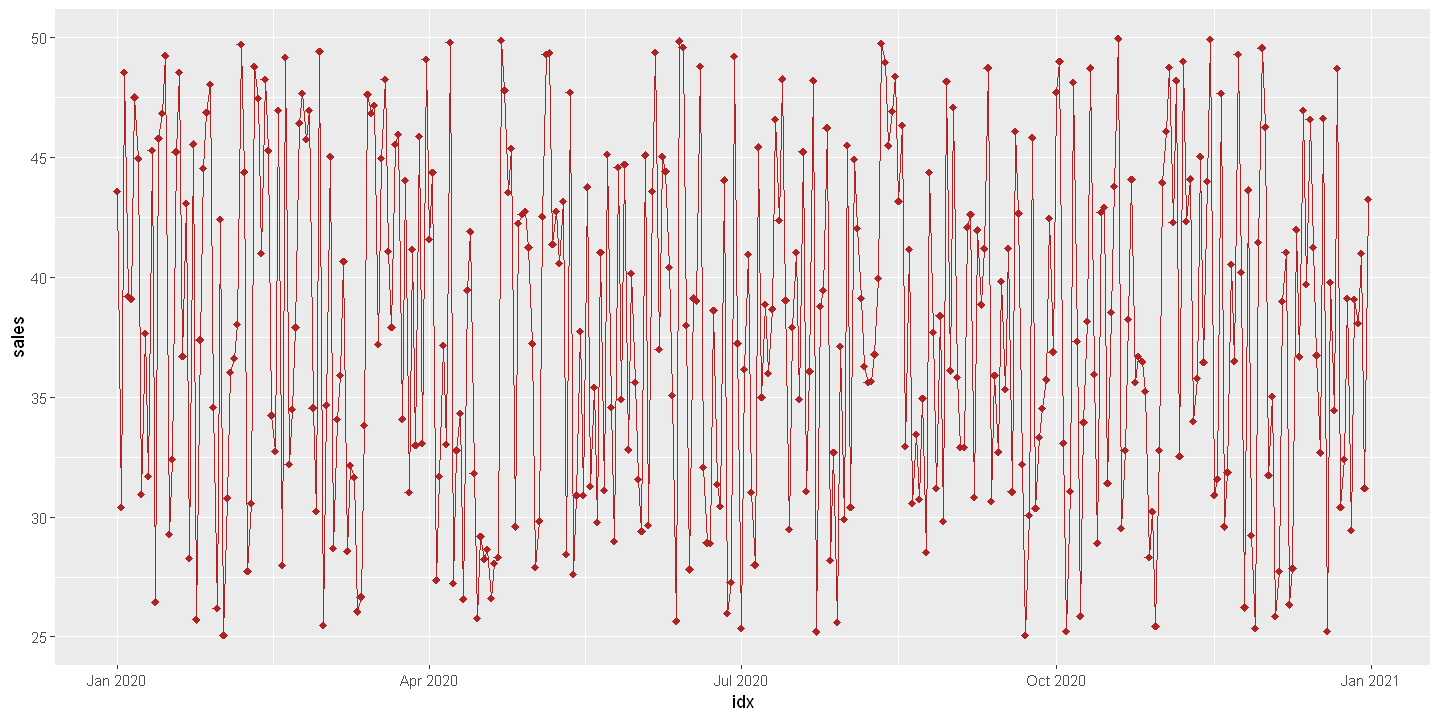

In [35]:
start_date <- mdy("Jan 1, 2020")
end_date <- mdy("Dec 31, 2020")
idx = seq(start_date,end_date,by ='day')
print(paste("length of index is ",length(idx)))
size = length(idx)
sales = runif(366,min=25,max=50)
sold_items <- data.frame(row.names=idx[0:size],sales)
ggplot(sold_items,aes(x=idx,y=sales)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", size = .3)

আমরা additional_items এবং sold_items একত্রিত করছি যাতে আমরা মোট পণ্যের সংখ্যা খুঁজে বের করতে পারি।  
আপনি দেখতে পাচ্ছেন, এখানে মোট সংখ্যা খুঁজে বের করতে আমাদের সমস্যা হচ্ছে, আমরা NaN মান পাচ্ছি কারণ সাপ্তাহিক সিরিজে উল্লেখ না করা দিনগুলো অনুপস্থিত (NaN) হিসেবে বিবেচিত হয়। যদি আমরা NaN-এর সাথে কোনো সংখ্যা যোগ করি, তাহলে সেটি NaN দেয়।  
যোগফল বের করার জন্য, আমাদের NaN-কে 0 দিয়ে প্রতিস্থাপন করতে হবে।  


In [36]:
index = seq(start_date,end_date,by = 'week')
sz = length(index)
additional_product <- rep(10,53)
additional_items  <- data.frame(row.names = index[0:sz],additional_product)
additional_items
# we are merging two dataframe so that we can add
additional_item = merge(additional_items,sold_items, by = 0, all = TRUE)[-1] 
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

additional_product
2020-01-01 10                
2020-01-08 10                
2020-01-15 10                
2020-01-22 10                
2020-01-29 10                
2020-02-05 10                
2020-02-12 10                
2020-02-19 10                
2020-02-26 10                
2020-03-04 10                
2020-03-11 10                
2020-03-18 10                
2020-03-25 10                
2020-04-01 10                
2020-04-08 10                
2020-04-15 10                
2020-04-22 10                
2020-04-29 10                
2020-05-06 10                
2020-05-13 10                
2020-05-20 10                
2020-05-27 10                
2020-06-03 10                
2020-06-10 10                
2020-06-17 10                
2020-06-24 10                
2020-07-01 10                
2020-07-08 10                
2020-07-15 10                
2020-07-22 10                
2020-07-29 10                
2020-08-05 10                
2020-08-12 10                
2020-08-19 10                
2020-08-26 10                
2020-09-02 10                
2020-09-09 10                
2020-09-16 10                
2020-09-23 10                
2020-09-30 10                
2020-10-07 10                
2020-10-14 10                
2020-10-21 10                
2020-10-28 10                
2020-11-04 10                
2020-11-11 10                
2020-11-18 10                
2020-11-25 10                
2020-12-02 10                
2020-12-09 10                
2020-12-16 10                
2020-12-23 10                
2020-12-30 10

total   
2020-01-01 53.59979
2020-01-02       NA
2020-01-03       NA
2020-01-04       NA
2020-01-05       NA
2020-01-06       NA
2020-01-07       NA
2020-01-08 40.93455
2020-01-09       NA
2020-01-10       NA
2020-01-11       NA
2020-01-12       NA
2020-01-13       NA
2020-01-14       NA
2020-01-15 59.24704
2020-01-16       NA
2020-01-17       NA
2020-01-18       NA
2020-01-19       NA
2020-01-20       NA
2020-01-21       NA
2020-01-22 38.26416
2020-01-23       NA
2020-01-24       NA
2020-01-25       NA
2020-01-26       NA
2020-01-27       NA
2020-01-28       NA
2020-01-29 44.58327
2020-01-30       NA
...        ...     
2020-12-02 41.74811
2020-12-03       NA
2020-12-04       NA
2020-12-05       NA
2020-12-06       NA
2020-12-07       NA
2020-12-08       NA
2020-12-09 37.85650
2020-12-10       NA
2020-12-11       NA
2020-12-12       NA
2020-12-13       NA
2020-12-14       NA
2020-12-15       NA
2020-12-16 46.73560
2020-12-17       NA
2020-12-18       NA
2020-12-19       NA
2020-12-20       NA
2020-12-21       NA
2020-12-22       NA
2020-12-23 40.42143
2020-12-24       NA
2020-12-25       NA
2020-12-26       NA
2020-12-27       NA
2020-12-28       NA
2020-12-29       NA
2020-12-30 41.20298
2020-12-31       NA

In [37]:
additional_item[is.na(additional_item)] = 0
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

total   
2020-01-01 53.59979
2020-01-02 30.41127
2020-01-03 48.54839
2020-01-04 39.20897
2020-01-05 39.09894
2020-01-06 47.53019
2020-01-07 44.94766
2020-01-08 40.93455
2020-01-09 37.66561
2020-01-10 31.68825
2020-01-11 45.30576
2020-01-12 26.45509
2020-01-13 45.81249
2020-01-14 46.84547
2020-01-15 59.24704
2020-01-16 29.28688
2020-01-17 32.41731
2020-01-18 45.23295
2020-01-19 48.54330
2020-01-20 36.69353
2020-01-21 43.09588
2020-01-22 38.26416
2020-01-23 45.56863
2020-01-24 25.70944
2020-01-25 37.38721
2020-01-26 44.53955
2020-01-27 46.88427
2020-01-28 48.05540
2020-01-29 44.58327
2020-01-30 26.19490
...        ...     
2020-12-02 41.74811
2020-12-03 35.03915
2020-12-04 25.84637
2020-12-05 27.73147
2020-12-06 39.00993
2020-12-07 41.03187
2020-12-08 26.33862
2020-12-09 37.85650
2020-12-10 41.98943
2020-12-11 36.68901
2020-12-12 46.96883
2020-12-13 39.70374
2020-12-14 46.59464
2020-12-15 41.24742
2020-12-16 46.73560
2020-12-17 32.68275
2020-12-18 46.64238
2020-12-19 25.22163
2020-12-20 39.79997
2020-12-21 34.45013
2020-12-22 48.71183
2020-12-23 40.42143
2020-12-24 32.41991
2020-12-25 39.12296
2020-12-26 29.43616
2020-12-27 39.09337
2020-12-28 38.09288
2020-12-29 41.00681
2020-12-30 41.20298
2020-12-31 43.25232

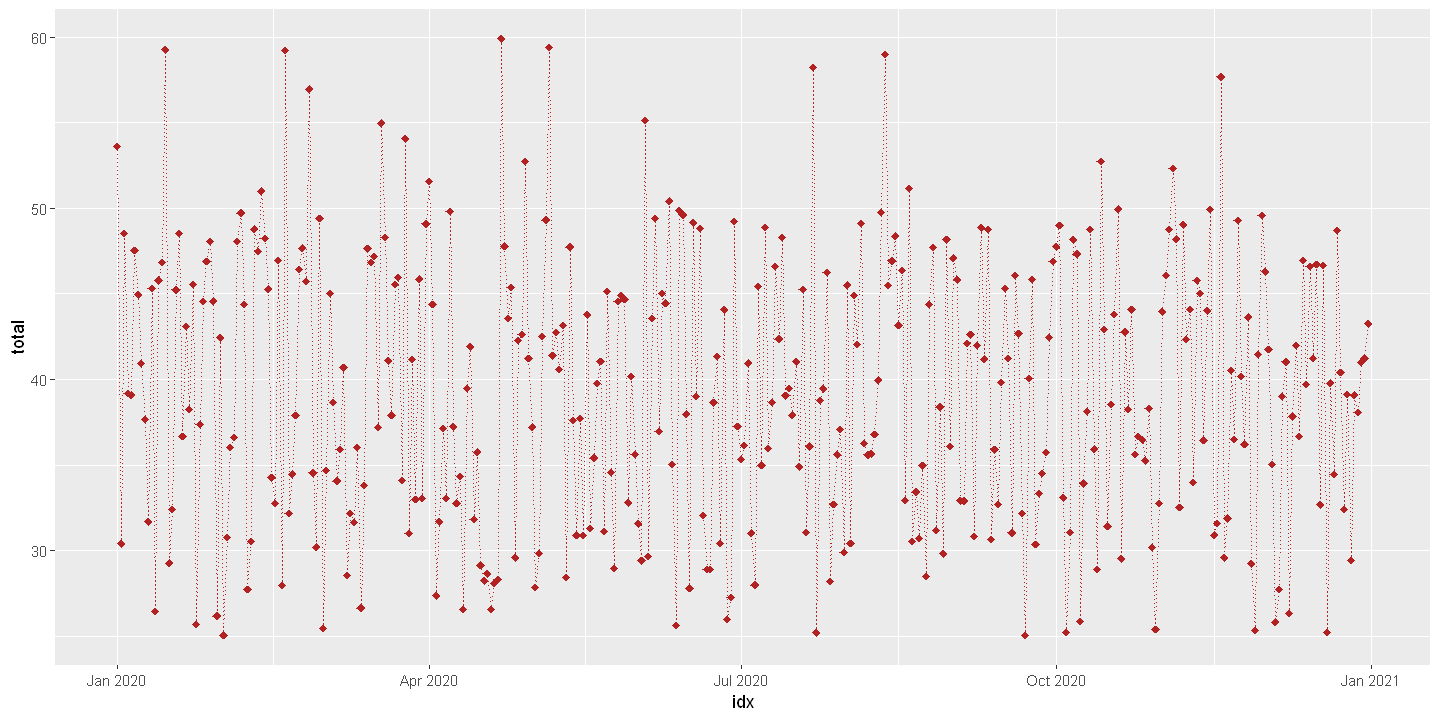

In [38]:
ggplot(total,aes(x=idx,y=total)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", linetype = "dotted", size = .3)

আমরা মাসিক ভিত্তিতে মোট পণ্যের সংখ্যা বিশ্লেষণ করতে চাই। সুতরাং, আমরা একটি মাসে মোট পণ্যের গড় বের করি এবং একটি বারগ্রাফ আঁকি।


In [39]:
index = seq(start_date,end_date,by ='month')


              total
2020-01-31 41.03847
2020-02-29 40.91568
2020-03-31 39.27424
2020-04-30 37.63589
2020-05-31 38.75129
2020-06-30 38.75744
2020-07-31 38.35212
2020-08-31 40.43712
2020-09-30 38.90043
2020-10-31 37.99855
2020-11-30 41.20759
2020-12-31 38.46355

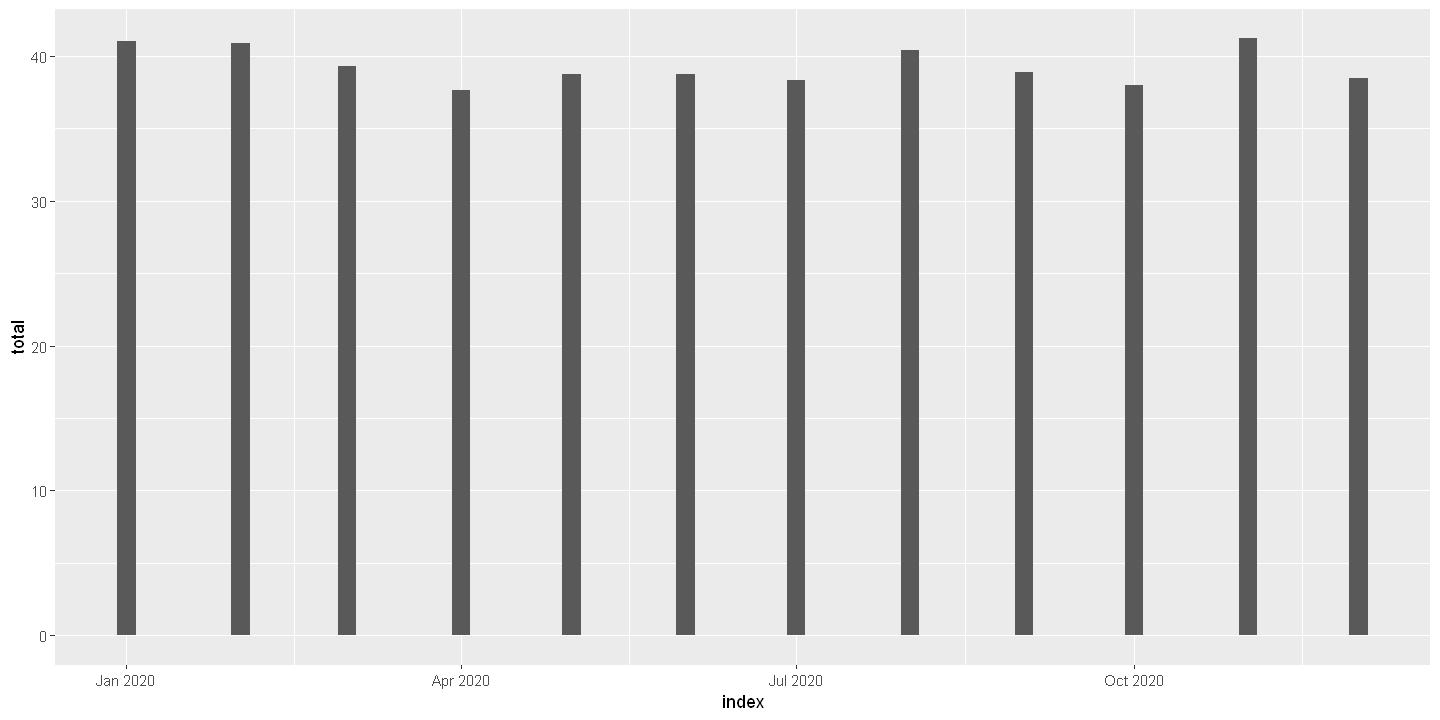

In [40]:
x<- as.xts(total, dateFormat ="Date")
(monthly<-apply.monthly(x,mean))
ggplot(monthly, aes(x=index, y=total)) + 
  geom_bar(stat = "identity", width=5) 

## ডেটাফ্রেম
ডেটাফ্রেম মূলত একই সূচক সহ সিরিজগুলোর একটি সংগ্রহ। আমরা একাধিক সিরিজ একসাথে মিলিয়ে একটি ডেটাফ্রেম তৈরি করতে পারি।  
উদাহরণস্বরূপ, আমরা a এবং b সিরিজের একটি ডেটাফ্রেম তৈরি করছি।


In [41]:
a = data.frame(a,row.names = c(1:a1))

In [42]:
b = data.frame(b,row.names = c(1:b1))

In [43]:
df<- data.frame(a,b)
df

a b     
1 1 I     
2 2 like  
3 3 to    
4 4 use   
5 5 Python
6 6 and   
7 7 Pandas
8 8 very  
9 9 much

আমরা পুনঃনামকরণ ফাংশন ব্যবহার করে কলামের নামও পরিবর্তন করতে পারি


In [44]:
df = 
  rename(df,
    A = a,
    B = b,
  )

In [45]:
df

A B     
1 1 I     
2 2 like  
3 3 to    
4 4 use   
5 5 Python
6 6 and   
7 7 Pandas
8 8 very  
9 9 much

আমরা select ফাংশন ব্যবহার করে একটি ডেটাফ্রেমে একটি কলামও নির্বাচন করতে পারি।


In [46]:
cat("Column A (series):\n")
select(df,'A')

Column A (series):


A
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9

আমরা এমন সারি বের করব যা সিরিজে একটি নির্দিষ্ট যৌক্তিক মানদণ্ড পূরণ করে।


In [47]:
df[df$A<5,]

A B   
1 1 I   
2 2 like
3 3 to  
4 4 use

In [48]:
df[df$A>5 & df$A<7,]

A B  
6 6 and

নতুন কলাম তৈরি করা।

নীচের কোডটি একটি সিরিজ তৈরি করে যা a এর গড় মান থেকে তার বিচ্যুতি গণনা করে এবং তারপর এটি একটি বিদ্যমান ডেটাফ্রেমে একত্রিত করে।


In [49]:
df$DivA <- df$A - mean(df$A)

In [50]:
df

A B      DivA
1 1 I      -4  
2 2 like   -3  
3 3 to     -2  
4 4 use    -1  
5 5 Python  0  
6 6 and     1  
7 7 Pandas  2  
8 8 very    3  
9 9 much    4

আমরা একটি সিরিজ তৈরি করছি যা A কলামের স্ট্রিংয়ের দৈর্ঘ্য গণনা করে তারপর বিদ্যমান ডেটাফ্রেমে একত্রিত করে।


In [51]:
df$LenB <- str_length(df$B)

In [52]:
df

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6   
6 6 and     1   3   
7 7 Pandas  2   6   
8 8 very    3   4   
9 9 much    4   4

সংখ্যার উপর ভিত্তি করে সারি নির্বাচন করা


In [53]:
df[0:5,]

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6

***গ্রুপিং বলতে বোঝায় নির্দিষ্ট শর্তের ভিত্তিতে একাধিক কলামকে একত্রিত করা এবং আমরা summarise ফাংশন ব্যবহার করে পার্থক্য দেখতে পারি***

ধরুন আমরা LenB-এর প্রতিটি নির্দিষ্ট সংখ্যার জন্য কলাম A-এর গড় মান গণনা করতে চাই। তখন আমরা আমাদের DataFrame-কে LenB দ্বারা গ্রুপ করতে পারি এবং গড় বের করে তাদের a নামে উল্লেখ করতে পারি।


In [54]:
df1 = df %>% group_by(LenB) %>% summarise(a = mean(A))

In [55]:
df1

LenB a       
1 1    1.000000
2 2    3.000000
3 3    5.000000
4 4    6.333333
5 6    6.000000

In [56]:
df2 = df %>% group_by(LenB) %>%
summarise(MEAN = mean(A),count =length(DivA))

## প্রিন্টিং এবং প্লটিং
যখন আমরা head(df) কল করি, এটি ডেটাফ্রেমকে ট্যাবুলার ফর্মে প্রিন্ট করবে।

যেকোনো ডেটা সায়েন্স প্রকল্পের প্রথম ধাপ হলো ডেটা পরিষ্কার করা এবং ভিজুয়ালাইজেশন করা, তাই ডেটাসেটটি ভিজুয়ালাইজ করা এবং কিছু দরকারী তথ্য বের করা গুরুত্বপূর্ণ।


In [57]:
#dataset = read.csv("file name")

In [58]:
head(df)

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6   
6 6 and     1   3

ggplot2 একটি খুব ভালো লাইব্রেরি কারণ এটি ডেটা ফ্রেমের ডেটা থেকে জটিল প্লট সহজে তৈরি করতে সাহায্য করে।

এটি কোন ভেরিয়েবল প্লট করতে হবে, কীভাবে সেগুলি প্রদর্শিত হবে এবং সাধারণ ভিজ্যুয়াল বৈশিষ্ট্যগুলি নির্ধারণ করার জন্য একটি আরও প্রোগ্রাম্যাটিক ইন্টারফেস প্রদান করে।


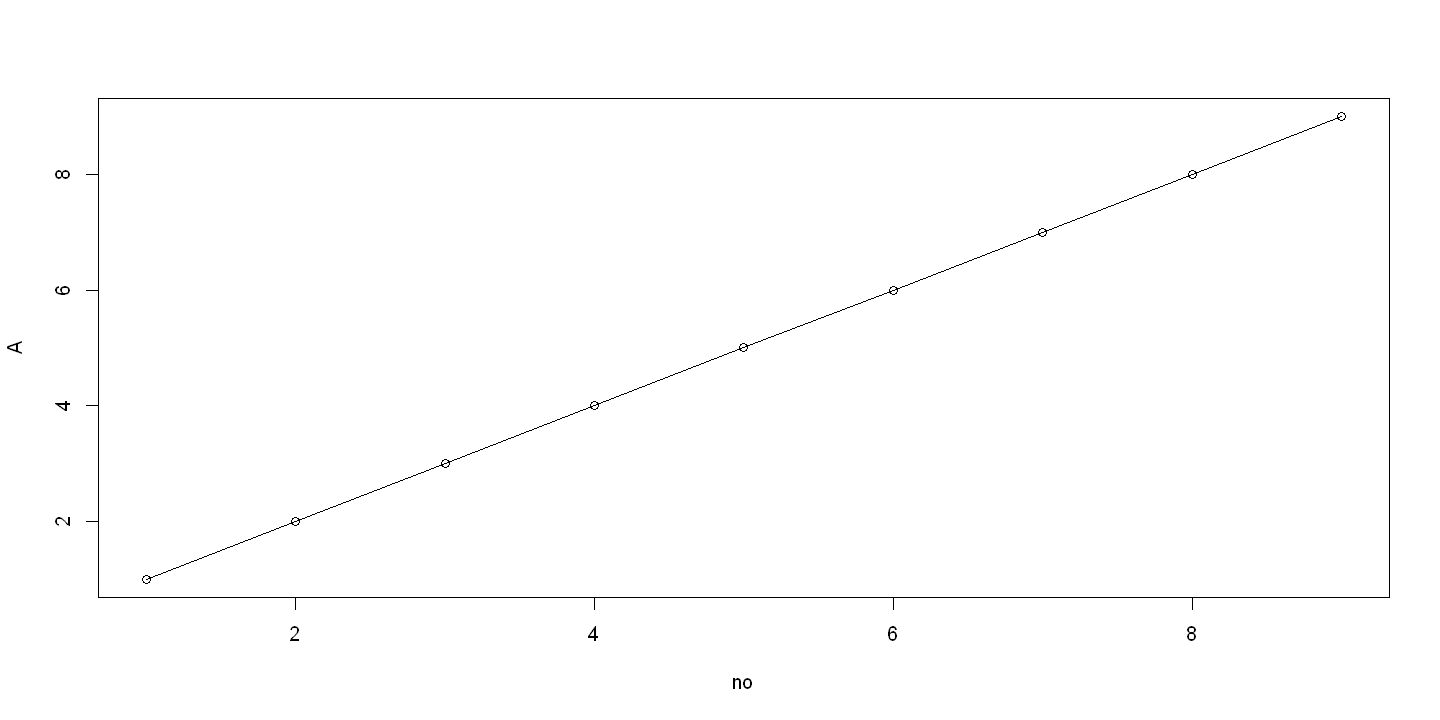

In [59]:
plot(df$A,type = 'o',xlab = "no",ylab = "A")

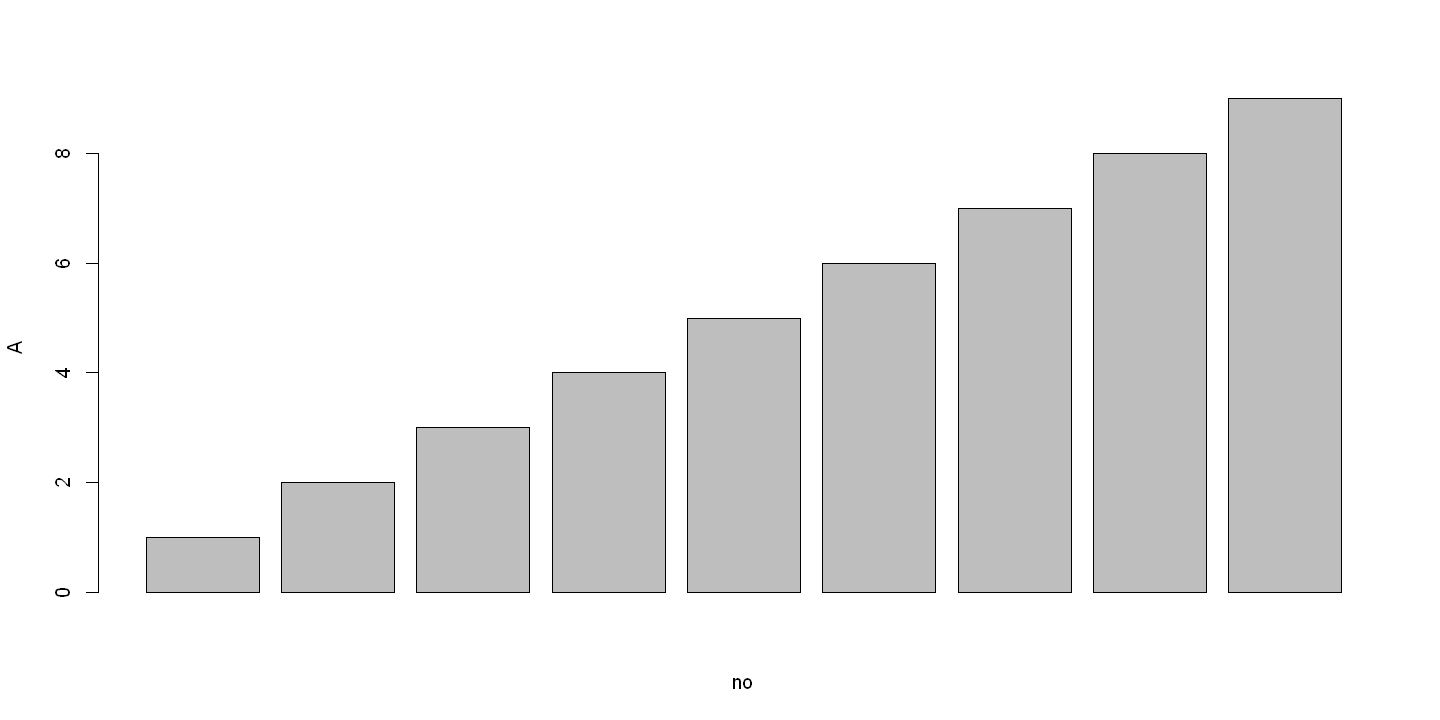

In [60]:
barplot(df$A, ylab = 'A',xlab = 'no')


---

**অস্বীকৃতি**:  
এই নথিটি AI অনুবাদ পরিষেবা [Co-op Translator](https://github.com/Azure/co-op-translator) ব্যবহার করে অনুবাদ করা হয়েছে। আমরা যথাসম্ভব সঠিক অনুবাদ প্রদানের চেষ্টা করি, তবে অনুগ্রহ করে মনে রাখবেন যে স্বয়ংক্রিয় অনুবাদে ত্রুটি বা অসঙ্গতি থাকতে পারে। মূল ভাষায় থাকা নথিটিকে প্রামাণিক উৎস হিসেবে বিবেচনা করা উচিত। গুরুত্বপূর্ণ তথ্যের জন্য, পেশাদার মানব অনুবাদ সুপারিশ করা হয়। এই অনুবাদ ব্যবহারের ফলে কোনো ভুল বোঝাবুঝি বা ভুল ব্যাখ্যা হলে আমরা দায়বদ্ধ থাকব না।
